In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:

# Display the first few rows of the DataFrame
df = pd.read_csv("Churn_Modelling.csv")

In [8]:
# Display the first few rows of the DataFrame

df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# The dataset contains the following columns:



##RowNumber: The row number.

CustomerId: Unique identifier for each customer.

Surname: The surname of the customer.

CreditScore: The credit score of the customer.

Geography: The country of residence for the customer.

Gender: The gender of the customer.

Age: The age of the customer.

Tenure: The number of years the customer has been with the bank.

Balance: The balance in the customer's account.

NumOfProducts: The number of bank products the customer is using.

HasCrCard: Whether the customer has a credit card (1 for yes, 0 for no).

IsActiveMember: Whether the customer is an active member (1 for yes, 0 for no).

EstimatedSalary: The estimated salary of the customer.

Exited: Whether the customer has churned or not (1 for yes, 0 for no).

# Here are some common types of analyses we could perform:#

Descriptive Statistics: Summary statistics for numerical and categorical variables.

Data Distribution: Histograms or box plots to understand the distribution of numerical variables.

Correlation Analysis: To understand the relationships between numerical variables.

Feature Importance: To identify which features are most related to customer churn.

Missing Values: Check for any missing or inconsistent data.

Outliers: Identify any outliers that could potentially skew the results.

#  Descriptive Statistics

In [9]:
# Generate summary statistics for numerical variables
numerical_summary = df.describe()

# Generate summary statistics for categorical variables
categorical_summary = df.describe(include=['object'])

numerical_summary, categorical_summary


(         RowNumber    CustomerId   CreditScore           Age        Tenure  \
 count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
 mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
 std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
 min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
 25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
 50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
 75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
 max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   
 
              Balance  NumOfProducts    HasCrCard  IsActiveMember  \
 count   10000.000000   10000.000000  10000.00000    10000.000000   
 mean    76485.889288       1.530200      0.70550        0.515100   
 std     62397.405202       0.581654      0.45584        0.499797   
 min       

# Data Distribution

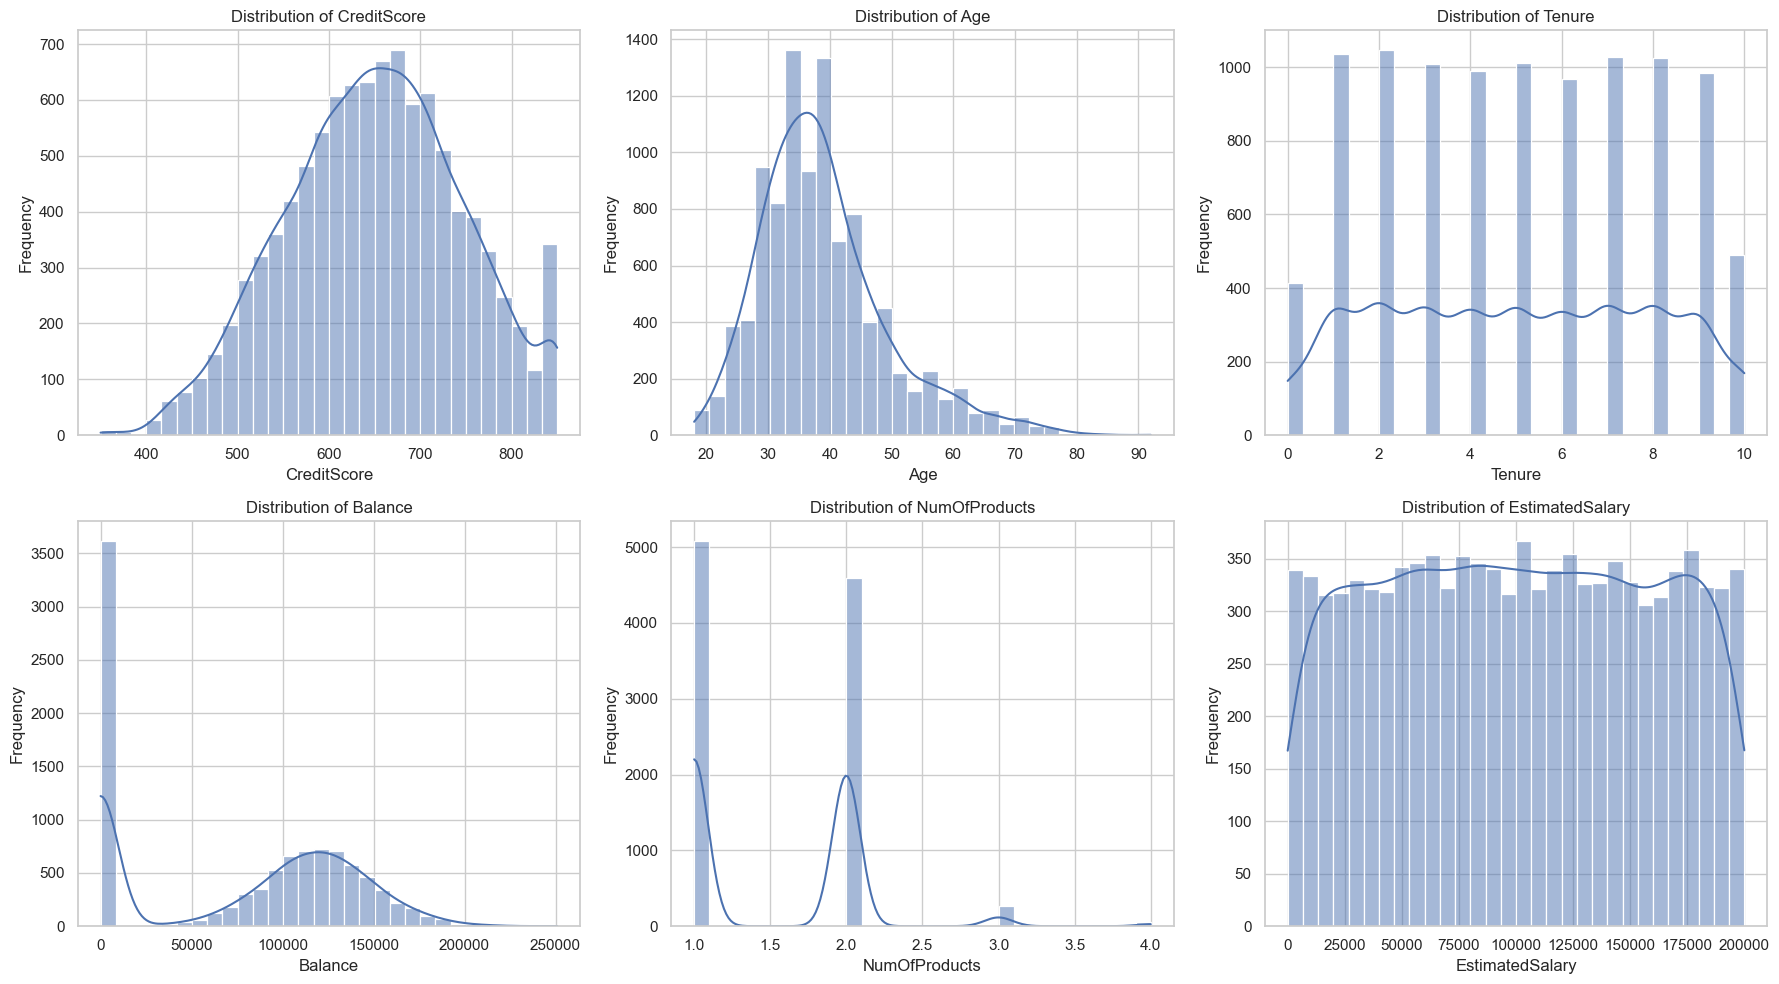

In [10]:


# Set the style for the plots
sns.set(style="whitegrid")

# List of numerical variables to plot
numerical_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot distribution for each numerical variable
for i, col in enumerate(numerical_columns):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


# Descriptive Statistics Summary:

Numerical Variables:
    
CreditScore: Ranges from 350 to 850 with a mean of approximately 650.52.
    
Age: Ranges from 18 to 92 with a mean age of approximately 38.92.
    
Tenure: Ranges from 0 to 10 years with a mean tenure of approximately 5.01 years.
    
Balance: Ranges from 0 to 250,898.09 with a mean balance of approximately 76,485.89.
    
NumOfProducts: Ranges from 1 to 4 with a mean of approximately 1.53.
    
HasCrCard: About 70.55% of customers have a credit card.
    
IsActiveMember: About 51.51% are active members.
    
EstimatedSalary: Ranges from 11.58 to 199,992.48 with a mean salary of approximately 100,090.24.
    
Exited: About 20.37% of the customers have churned (Exited = 1).
    
# Categorical Variables:

Surname: There are 2,932 unique surnames, with 'Smith' being the most frequent.
    
Geography: Three countries are represented, with France being the most common.
    
Gender: There are more males (54.57%) than females in the dataset.

# Data Distribution

##   Data Distribution Summary:

CreditScore: The distribution is somewhat normal but slightly left-skewed. 

Most customers have credit scores between 600 and 700.
    
Age: The distribution is right-skewed, with most customers falling between 30 and 40 years of age.
    
Tenure: The distribution is fairly uniform, except for a noticeable peak at 0 and 10 years.
    
Balance: A significant number of customers have a zero balance, creating a bimodal distribution.
    
NumOfProducts: Most customers have 1 or 2 products, with fewer having 3 or 4.
    
EstimatedSalary: The distribution appears uniform, suggesting that salary does not vary in any specific pattern.


# 3. Correlation Analysis

a correlation analysis to understand the relationships between the numerical variables.

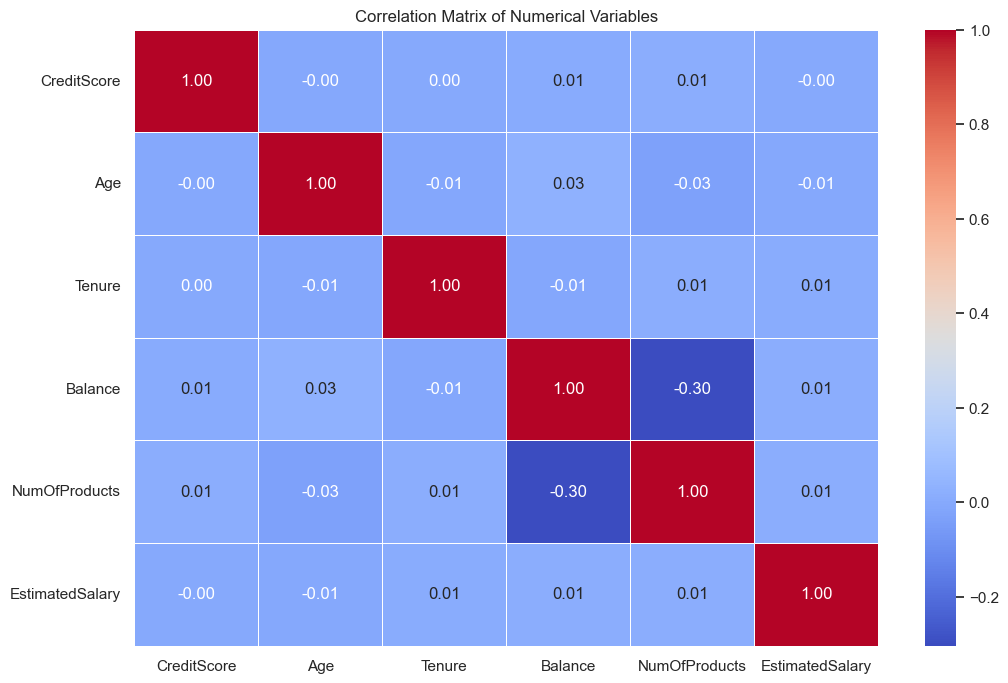

In [19]:
# Calculate the correlation matrix for numerical variables
correlation_matrix = df[numerical_columns].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()


# Correlation Analysis Summary:
CreditScore does not seem to be strongly correlated with any other numerical variables.

Age also shows weak correlations with other variables, though it might be interesting to note that it has a negative correlation with the NumOfProducts.

Tenure and Balance show very low correlations with other variables.

NumOfProducts and Balance have a weak negative correlation of -0.30, suggesting customers with more products tend to have a lower balance.

EstimatedSalary shows weak correlations with all other variables, indicating it might not be a strong predictor for customer churn on its own.

The overall low correlations suggest that the variables are fairly independent of each other, which is generally good when we consider building predictive models later.

# Feature Importance

 Examining the importance of each feature in relation to customer churn (

In [20]:
from sklearn.ensemble import RandomForestClassifier

# Prepare the data for feature importance calculation
X = df.drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis=1)  # Drop irrelevant columns
X = pd.get_dummies(X, drop_first=True)  # Convert categorical variables to dummy variables
y = df['Exited']

In [21]:
# Initialize the Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)

# Fit the model to the entire dataset
rf_clf.fit(X, y)



RandomForestClassifier(random_state=42)

In [23]:
# Get feature importances
feature_importances = rf_clf.feature_importances_

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})